In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
dataTrain = pd.read_csv("/home/machouba/CC_42/Train_knight.csv")

dataTrain.drop(columns=["knight"], inplace=True)  # On enlève la cible binaire pour le calcul des variances

print(dataTrain)

     Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0         11.800     17.26     75.26   431.9  0.09087    0.06232   0.028530   
1         19.810     22.15    130.00  1260.0  0.09831    0.10270   0.147900   
2         10.970     17.20     71.73   371.5  0.08915    0.11130   0.094570   
3         11.620     18.18     76.38   408.8  0.11750    0.14830   0.102000   
4         11.260     19.83     71.30   388.1  0.08511    0.04413   0.005067   
..           ...       ...       ...     ...      ...        ...        ...   
393        8.618     11.79     54.34   224.5  0.09752    0.05272   0.020610   
394       13.530     10.94     87.91   559.2  0.12910    0.10470   0.068770   
395       11.640     18.33     75.17   412.5  0.11420    0.10170   0.070700   
396        9.876     19.40     63.95   298.3  0.10050    0.09697   0.061540   
397       19.550     28.77    133.60  1207.0  0.09260    0.20630   0.178400   

     Prescience  Reactivity  Midi-chlorien  ...  Re

In [58]:
var = dataTrain.var()
sum_var = np.sum(var)
print(var)
print(sum_var)

Sensitivity          11.713335
Hability             17.264915
Strength            555.161298
Power            114926.555203
Agility               0.000185
Dexterity             0.002603
Awareness             0.006245
Prescience            0.001419
Reactivity            0.000704
Midi-chlorien         0.000044
Slash                 0.082092
Push                  0.303136
Pull                  4.405535
Lightsaber         2266.729827
Survival              0.000009
Repulse               0.000277
Friendship            0.001015
Blocking              0.000038
Deflection            0.000054
Mass                  0.000007
Recovery             21.653976
Evade                35.842396
Stims              1050.961221
Sprint           288813.118321
Combo                 0.000524
Delay                 0.025687
Attunement            0.046422
Empowered             0.004278
Burst                 0.003337
Grasping              0.000341
dtype: float64
407703.8844438544


In [59]:
standardized_dataTrain = StandardScaler().fit_transform(dataTrain)
pca = PCA(n_components=30)
pca.fit_transform(standardized_dataTrain)
print("Variances (Percentage):")
print(pca.explained_variance_ratio_)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variances (Percentage):")
print(cumulative_variance_ratio * 100)

Variances (Percentage):
[4.42124322e-01 1.83133809e-01 9.86939994e-02 6.44725649e-02
 5.48418978e-02 3.86419671e-02 2.40371418e-02 1.86115266e-02
 1.42841975e-02 1.14635004e-02 1.03990775e-02 9.15659049e-03
 8.25582942e-03 4.49675980e-03 3.24922360e-03 2.80700452e-03
 2.22879421e-03 1.99287079e-03 1.59928087e-03 1.12338278e-03
 1.11953696e-03 8.29193824e-04 7.91693696e-04 5.73407566e-04
 5.14260951e-04 2.68407149e-04 2.06171597e-04 5.70303169e-05
 2.27265764e-05 3.83020159e-06]
Cumulative Variances (Percentage):
[ 44.21243224  62.52581316  72.3952131   78.84246959  84.32665937
  88.19085608  90.59457026  92.45572292  93.88414267  95.03049271
  96.07040047  96.98605952  97.81164246  98.26131844  98.5862408
  98.86694125  99.08982067  99.28910775  99.44903584  99.56137412
  99.67332781  99.75624719  99.83541656  99.89275732  99.94418342
  99.97102413  99.99164129  99.99734432  99.99961698 100.        ]


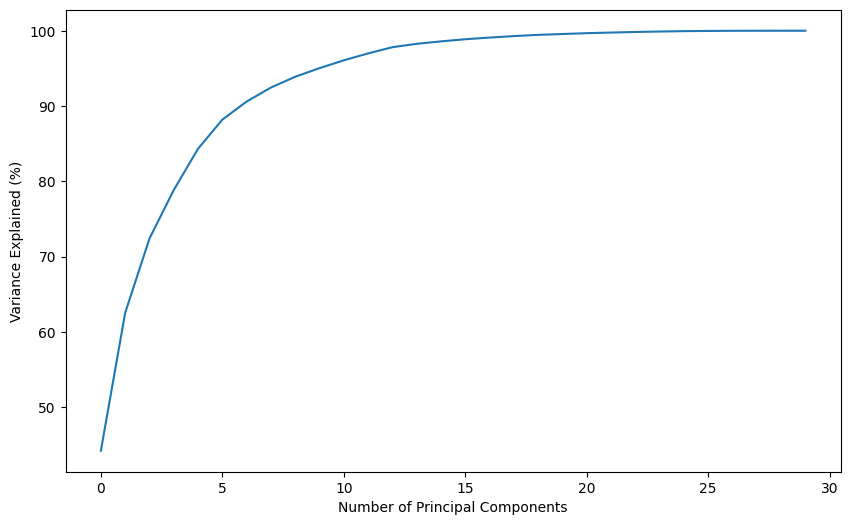

In [60]:
cumulative_variance_ratio = cumulative_variance_ratio * 100

plt.figure(figsize=(10, 6))
plt.plot(range(30), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained (%)')
plt.show()